In [147]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import odeint
import scipy

In [148]:
def toggle_switch(yz, t, beta_y, beta_z, n_x, n_y, Km1, Km2, delta):
    """
    Right hand side for cascade X -> Y -> Z.  Return dy/dt and dz/dt.
    """
    # Unpack y and z
    y, z = yz

    # Compute dy/dt
    dy_dt = beta_y/ (1 + (z/Km1)**n_x) - delta*y
    
    # Compute dz/dt
    dz_dt = beta_z/ (1 + (y/Km2)**n_y) - delta*z
    
    
    # Return the result as a NumPy array
    return np.array([dy_dt, dz_dt])

In [149]:
def general_toggle_switch(yz, t, *args):
    """
    Right hand side for cascade X -> Y -> Z.  Return dy/dt and dz/dt.
    """
    #args = (np.array(args).reshape(2, 6))
    args1 = np.array([args[0], args[1], args[2], args[3]])
    args2 = np.array([args[4], args[5], args[6], args[7]])#, args[5], args[12], args[13]])
    
    # Unpack y and z
    y, z = yz
    
    # Compute dy/dt
    dy_dt = generalized_hill_function(z, args1) - args1[3]*y
    
    # Compute dz/dt
    dz_dt = generalized_hill_function(y, args2) - args2[3]*z
    
    # Return the result as a NumPy array
    return np.array([dy_dt, dz_dt])

In [150]:
def generalized_hill_function(y, args):
    b    = args[0]
    n    = args[1]
    beta  = args[2]
    return beta/(1 + b*y**n)

In [151]:
def residuals(p):
    p = tuple(p)
    sim_P = odeint(general_toggle_switch, iv, t, args = p).T
    #print(sim_P)
    res = (sim_P - exp_P)**2
    #print(np.sum(res.flatten()**2))
    return res.flatten()

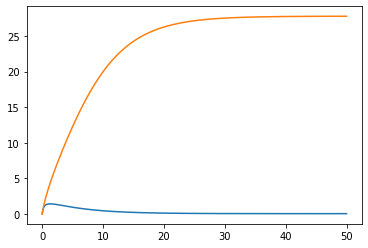

In [153]:
y_og_scaled = []
z_og_scaled = []

for i in range(0, len(y_og)):
    y_og_scaled.append((y_og[i] - np.mean(y_og))/np.std(y_og))
    z_og_scaled.append((z_og[i] - np.mean(z_og))/np.std(z_og))
    
y_og_scaled = np.array(y_og_scaled) + np.abs(np.min((y_og_scaled)))
z_og_scaled = np.array(z_og_scaled) + np.abs(np.min((z_og_scaled)))

                                             
#for ii in range()

In [154]:
yz_scaled = np.array(list(zip(y_og_scaled, z_og_scaled))).T

In [155]:
exp_P = yz_scaled# + np.random.randn(len(yz_og))*0.5
exp_P = exp_P#[::5]

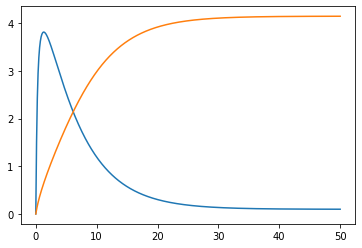

In [156]:
plt.plot(t, y_og_scaled)
plt.plot(t, z_og_scaled)

In [158]:
initial_guess = [2, 2, 5, 0.1, 2, 2, 5, 0.1]
fitted_params = least_squares(residuals, initial_guess, bounds=(0, np.inf), method = 'trf', max_nfev=10000, verbose=2, ftol=1e-012, xtol=1e-012)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.6427e+04                                    1.18e+07    
       1              4         7.4471e+03      8.98e+03       7.75e-02       2.94e+06    
       2              5         5.0712e+03      2.38e+03       1.56e-01       4.33e+05    
       3              7         4.7521e+03      3.19e+02       4.57e-02       2.35e+06    
       4              8         4.2877e+03      4.64e+02       5.34e-02       3.33e+06    
       5              9         3.7026e+03      5.85e+02       4.65e-02       2.99e+06    
       6             10         3.3470e+03      3.56e+02       4.42e-02       3.09e+06    
       7             11         3.0198e+03      3.27e+02       4.11e-02       2.81e+06    
       8             12         2.7972e+03      2.23e+02       3.97e-02       2.72e+06    
       9             13         2.5975e+03      2.00e+02       3.84e-02       2.44e+06    

      93             107        7.6830e-12      7.60e-11       7.23e-02       5.60e-07    
      94             108        6.1902e-13      7.06e-12       4.09e-02       8.59e-08    
      95             109        4.6659e-14      5.72e-13       2.20e-02       1.24e-08    
      96             110        3.5802e-15      4.31e-14       1.15e-02       1.79e-09    
`gtol` termination condition is satisfied.
Function evaluations 110, initial cost 1.6427e+04, final cost 3.5802e-15, first-order optimality 1.79e-09.


In [159]:
fitted_params

 active_mask: array([0, 0, 0, 0, 0, 0, 0, 0])
        cost: 3.580181833774178e-15
         fun: array([0.00000000e+00, 3.79783038e-09, 5.71342206e-09, ...,
       1.69040098e-09, 1.69258717e-09, 1.69475524e-09])
        grad: array([ 3.32149502e-12, -1.60668051e-10, -2.20042621e-11,  8.03966182e-10,
       -1.78509867e-09, -6.57846820e-11,  4.75040523e-10, -1.43976271e-10])
         jac: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.67479005e-08,  1.02198397e-05,  7.44109917e-06, ...,
        -2.01721583e-08, -7.99244435e-06,  1.38453165e-07],
       [-4.83847876e-07,  6.03040465e-05,  1.68860535e-05, ...,
        -8.07816265e-08, -5.79351877e-05,  1.94905844e-06],
       ...,
       [-7.07573374e-09, -2.72616620e-07,  2.83243065e-08, ...,
        -2.40415086e-07, -4.56675240e-04,  1.90095602e-03],
       [-7.05817463e-09, -2.73307775e-07,  2.82160122e-08, ...,
        -2.40825687e-07, -4.56969585e

In [161]:
fitted_params.fun.shape

(1600,)

In [168]:
from sklearn.metrics import r2_score
r2_score(exp_P, np.array([odeint(general_toggle_switch, iv, t, args = tuple(fitted_params.x)).T[0],
odeint(general_toggle_switch, iv, t, args = tuple(fitted_params.x)).T[1]]))

0.9999995392999813

In [167]:
exp_P

array([[0.        , 0.81562569, 1.50091264, ..., 0.09850592, 0.09849272,
        0.09847966],
       [0.        , 0.04614139, 0.08999019, ..., 4.14885775, 4.14887128,
        4.14888467]])

In [166]:
np.array([odeint(general_toggle_switch, iv, t, args = tuple(fitted_params.x)).T[0],
odeint(general_toggle_switch, iv, t, args = tuple(fitted_params.x)).T[1]])

array([[0.        , 0.81568732, 1.50098823, ..., 0.09851283, 0.09849964,
        0.09848658],
       [0.        , 0.04616524, 0.09003216, ..., 4.14881664, 4.14883014,
        4.1488435 ]])

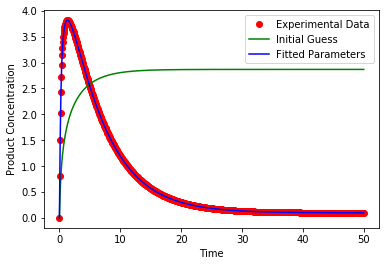

In [132]:
plt.plot(t, exp_P[0], 'ro')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[0], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(fitted_params)).T[0], 'b-')
plt.legend(['Experimental Data', 'Initial Guess', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

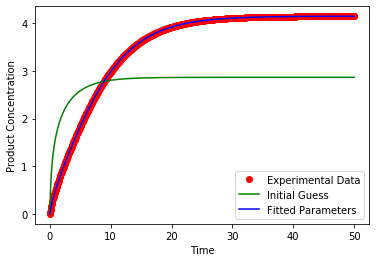

In [133]:
plt.plot(t, exp_P[1], 'ro')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(initial_guess)).T[1], 'g-')
plt.plot(t, odeint(general_toggle_switch, iv, t, args = tuple(fitted_params)).T[1], 'b-')
plt.legend(['Experimental Data', 'Initial Guess', 'Fitted Parameters'], loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.show()

In [134]:
a1_node1 = 0
a1_node2 = 0
a2_node1 = 0
a2_node2 = 0
b1_node1 = 0
b1_node2 = 0
b2_node1 = 0
b2_node2 = 0
    
b1_node1 = fitted_params[0]
b1_node2 = fitted_params[4]
n1 = fitted_params[1]
n2 = fitted_params[5]
beta_node1 = fitted_params[2]
beta_node2 = fitted_params[6]
delta_node1 = fitted_params[3]
delta_node2 = fitted_params[7]



# Node 1

In [135]:
from IPython.display import Latex

Latex('$\dot{x}_1 ='+str(beta_node1)+' \\frac{1+'+str((a1_node1))+'x_1^{'+str((n1))+'}+'+str((a2_node1))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node1))+'x_1^{'+str((n1))+'}+'+str((b2_node1))+'x_2^{'+str((n2))+'}} - ' + str(delta_node1)+'x_1 $')

<IPython.core.display.Latex object>

In [136]:
Latex('$\dot{x}_2 = '+str(beta_node2)+'\\frac{1+'+str((a1_node2))+'x_1^{'+str((n1))+'}+'+str((a2_node2))+'x_2^{'+str((n2))+'}}{1+'+str((b1_node2))+'x_1^{'+str((n1))+'}+'+str((b2_node2))+'x_2^{'+str((n2))+'}} - ' + str(delta_node2)+'x_2 $')

<IPython.core.display.Latex object>

In [105]:
fitted_params

array([4.47586074e+01, 2.00019499e+00, 1.35198394e+01, 1.80013768e-01,
       3.43217713e-02, 1.99844506e+00, 7.47774572e-01, 1.80125957e-01])